In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [135]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS
from nltk import word_tokenize
from nltk.corpus import stopwords

In [128]:
class NLP_model():
    
    def __init__(self,):
        self.a=None
        
    def text_clean(self,string):
        string=re.sub(r'./8&^',' ',string)
        string= re.sub(r"[^\w\s]", '',string)
        string=re.sub(r'\d',' ',string)
        return string
    
    def remove_stopwords(self,string): 
        stop = set(stopwords.words('english'))
        string=[i for i in string.lower().split() if i not in stop]
        return string

    def freq_plot(df,category=None):
        df_1=df[df.category==1]
        list1=list(df_1['review'].apply(lambda x: x.split()))
        a=list1[0]
        b=[a.count(i) for i in a]
        word_freq_dict=dict(zip(a,b))
        print(word_freq_dict)
        a=sorted(word_freq_dict.items(), key=lambda kv: kv[1])
        words_names=[]
        words_count=[]
        for (word, freq) in a:
            #print (word, freq)
            words_names.append(word)
            words_count.append(freq)
         #Plot histogram using matplotlib bar()
        plt.xlabel('Top 10 Words')
        plt.ylabel('Frequency')
        plt.title('Plotting Word Frequency')
        indexes = np.arange(len(words_names) )
        width = .4
        plt.bar(indexes, words_count, width)
        plt.xticks(indexes + width * .4, words_names)
        #plt.legend()
        plt.tight_layout()
        return plt.show()
    

    stopwords = set(STOPWORDS)

    def show_wordcloud(self,data, title = None):
        wordcloud = WordCloud(
            background_color='white',
            stopwords=stopwords,
            max_words=200,
            max_font_size=40, 
            scale=3,
            random_state=1 
        ).generate(str(data))

        fig = plt.figure(1, figsize=(12, 12))
        plt.axis('off')
        if title: 
            fig.suptitle(title, fontsize=20)
            fig.subplots_adjust(top=2.3)

        plt.imshow(wordcloud)
        return plt.show()


    def train_test_split(self,data):
        train, test = train_test_split(data, random_state=42, test_size=0.30, shuffle=True)

        
        vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')
        x_train=vectorizer.fit_transform(train)
        #x_train=x_train.transform(x_train)
        y_train=train.drop(labels = ['review'], axis=1)
        
        x_test = vectorizer.transform(test)
        y_test = test.drop(labels = ['review'], axis=1)
        
        return x_train,y_train,x_test,y_test
    
    
    def fit(self,):
        # Create one-vs-rest logistic regression object
        clf = LogisticRegression(random_state=0, multi_class='ovr')
        model = clf.fit(X_std, y)
        # Predict class
        model.predict(new_observation)


In [115]:
df['review']=df['review'].apply(NLP_model().text_clean)

In [114]:
df

,review,category
0,movie isnot,1
1,it is possible,2


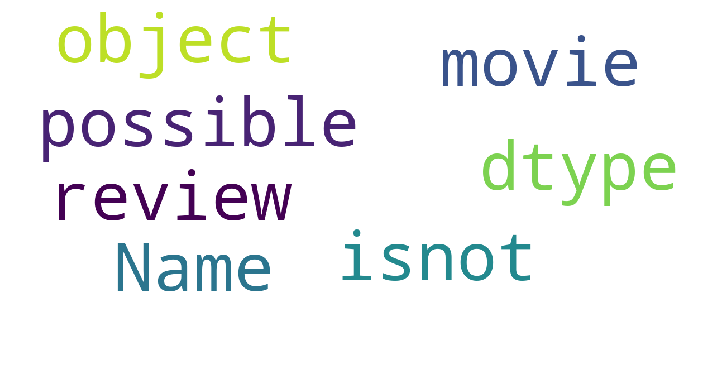

In [47]:
NLP_model().show_wordcloud(df['review'])

{'movie': 1, 'isnot': 1}


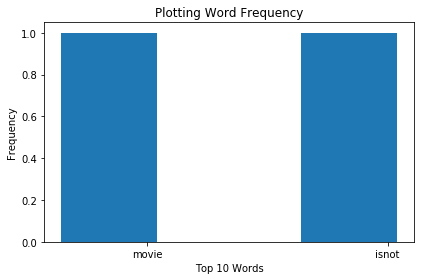

In [48]:
NLP_model.freq_plot(df=df)

In [ ]:
# create a dataframe using texts and lables
trainDF = pandas.DataFrame()
trainDF['text'] = texts
trainDF['label'] = labels

In [ ]:
# split the dataset into training and validation datasets 
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(trainDF['text'], trainDF['label'])

# label encode the target variable 
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)

In [ ]:
# create a count vectorizer object 
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(trainDF['text'])

# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect.transform(train_x)
xvalid_count =  count_vect.transform(valid_x)

In [ ]:
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(trainDF['text'])
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)

In [ ]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    return metrics.accuracy_score(predictions, valid_y)

In [ ]:
# Naive Bayes on Count Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_count, train_y, xvalid_count)
print "NB, Count Vectors: ", accuracy